## Importing models for analysis

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from sklearn.svm import SVC
from wordcloud import WordCloud
import re

In [6]:
# Loading the dataset
df = pd.read_csv('train.csv')
data = pd.read_csv('test_with_no_labels.csv')

## Exploratory data analysis (EDA)

In [7]:
# printing the column in the dataset
print(df.columns)

Index(['sentiment', 'message', 'tweetid'], dtype='object')


In [8]:
# checking for null value in the dataset
df.isna().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [9]:
# checking to know the number of rows and column
df.shape

(15819, 3)

In [10]:
# checking for information in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [11]:
# checking for the unique values in tweetid column
type_labels = list(df['tweetid'].unique())
print(type_labels)

[625221, 126103, 698562, 573736, 466954, 425577, 294933, 992717, 664510, 260471, 295793, 763719, 454673, 41161, 658092, 319524, 698009, 490604, 228658, 547924, 625014, 690605, 67545, 567842, 684492, 438578, 365291, 387685, 355491, 354015, 365051, 432987, 143471, 11622, 497877, 817108, 526603, 362709, 569142, 403368, 303380, 8984, 765266, 326916, 905639, 741568, 61141, 344320, 719523, 499888, 310105, 785499, 352623, 785637, 201391, 771000, 911385, 768263, 113396, 526281, 774850, 650843, 451296, 709019, 645201, 592548, 827355, 687045, 978125, 530545, 857540, 51718, 726430, 179066, 497887, 981123, 583059, 809226, 931994, 225985, 732924, 41232, 917639, 139646, 176885, 378020, 332871, 560522, 199878, 490544, 58158, 204879, 577185, 902602, 614812, 458845, 695439, 894382, 603318, 554354, 880647, 957257, 12265, 686794, 483815, 902089, 540020, 798585, 55935, 513782, 841527, 406598, 664093, 337974, 638318, 136694, 472265, 946866, 968815, 491820, 677366, 740194, 97375, 383885, 958567, 904812, 137

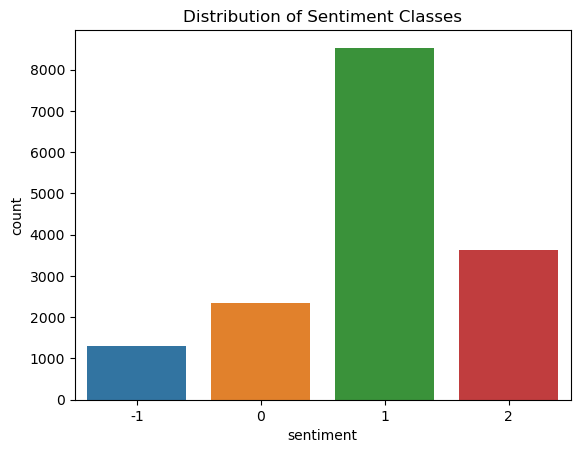

In [12]:
# checking for the distribution of sentiment column
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiment Classes')
plt.show()

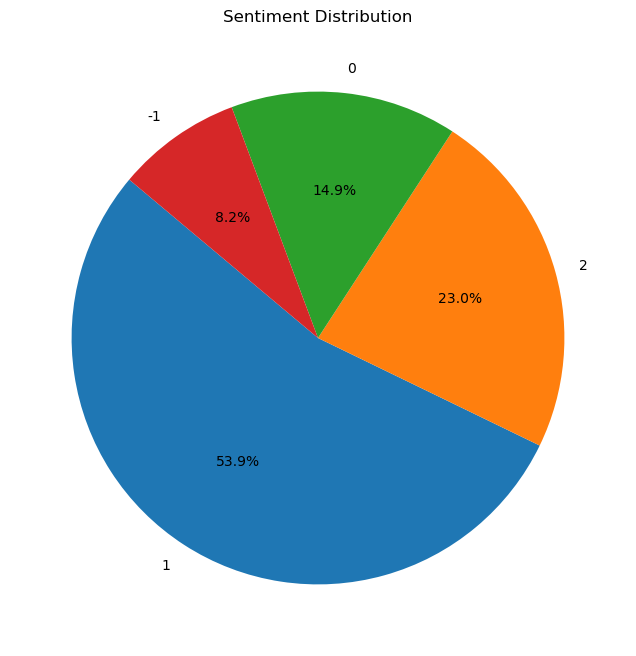

In [13]:
# checking for the ratio of distribution of values in segment column
sentiment_counts = df['sentiment'].value_counts()

# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.show()

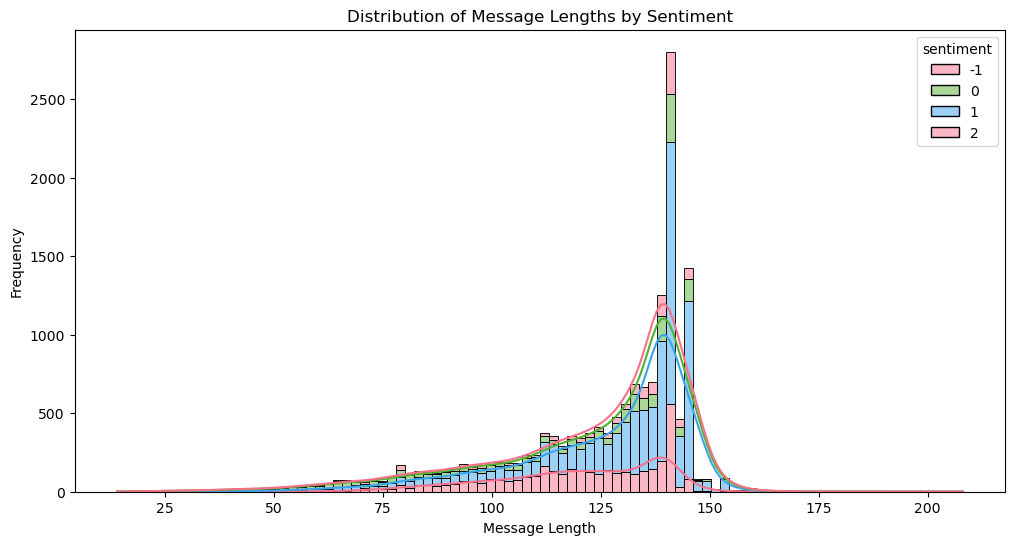

In [14]:
# checking the distribution of message lenght by sentiment
df['message_length'] = df['message'].apply(len)
# Creating a histogram with different colors for each sentiment
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='message_length', hue='sentiment', kde=True, palette='husl', multiple='stack')
plt.title('Distribution of Message Lengths by Sentiment')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

## Text preprocessing

In [15]:
def preprocess_text(text):
    # Converting text to lowercase
    text = text.lower()
    
    # Removing special characters and numbers
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    
    # Tokenization
    tokens = word_tokenize(text)
    
     # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    return ' '.join(tokens)

df['clean_message'] = df['message'].apply(preprocess_text)
df

,sentiment,message,tweetid,message_length,clean_message
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,140,polyscimajor epa chief doesnt think carbon dio...
1,1,It's not like we lack evidence of anthropogeni...,126103,62,like lack evidence anthropogenic global warming
2,2,RT @RawStory: Researchers say we have three ye...,698562,140,rt rawstory researcher say three year act clim...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99,todayinmaker wired wa pivotal year war climate...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,122,rt soynoviodetodas racist sexist climate chang...
...,...,...,...,...,...
15814,1,RT @ezlusztig: They took down the material on ...,22001,140,rt ezlusztig took material global warming lgbt...
15815,2,RT @washingtonpost: How climate change could b...,17856,119,rt washingtonpost climate change could breakin...
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248,133,notiven rt nytimesworld doe trump actually bel...
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732,128,rt sarasmiles hey liberal climate change crap ...


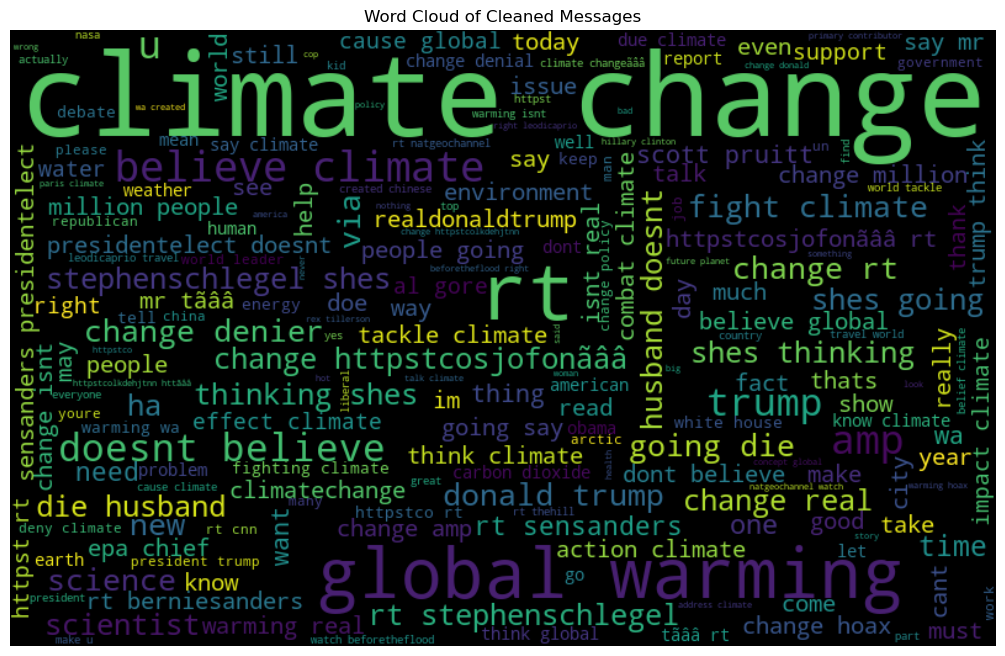

In [16]:
# Text Visualization - Word Cloud of cleaned text
all_words = " ".join([sentence for sentence in df['clean_message']])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Messages')
plt.show()

Text(0.5, 0, 'Words')

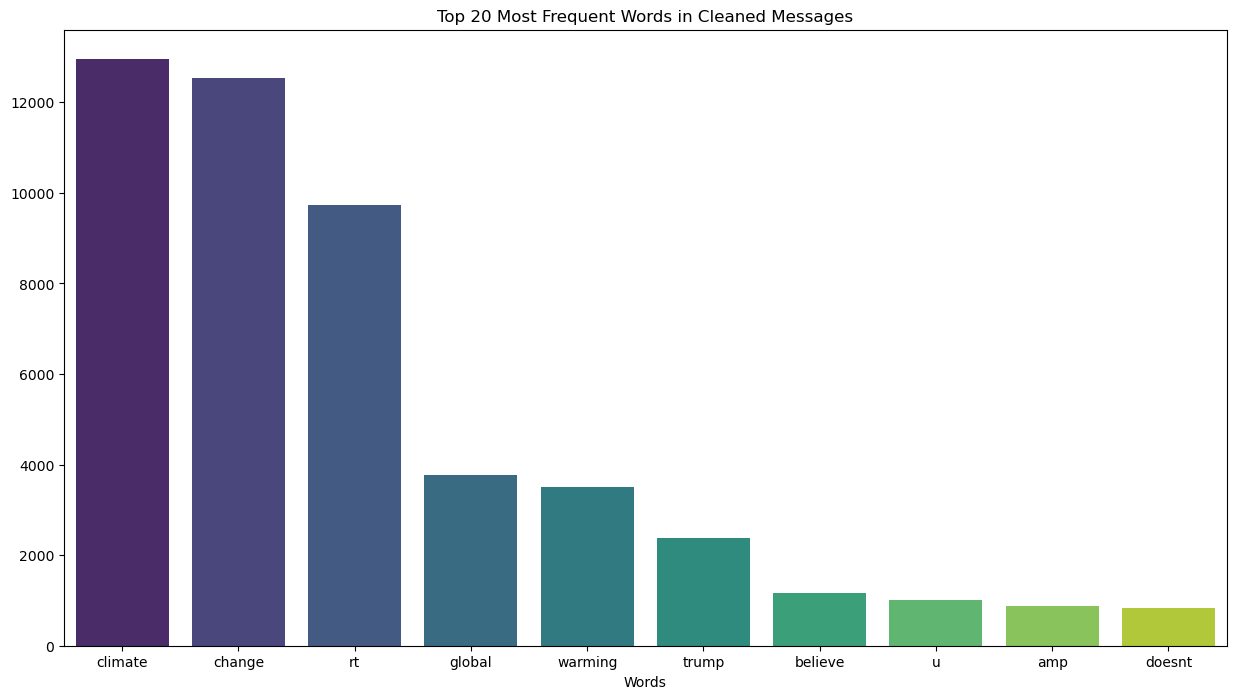

In [17]:
# Tokenizing the cleaned messages
tokenized_messages = [word for sentence in df['clean_message'] for word in sentence.split()]

# Counting the frequency of each word
word_frequency = Counter(tokenized_messages)

# Ploting the top N frequent words
top_words = word_frequency.most_common(10) 

# Creating a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x=[word[0] for word in top_words], y=[word[1] for word in top_words], palette='viridis')
plt.title('Top 20 Most Frequent Words in Cleaned Messages')
plt.xlabel('Words')

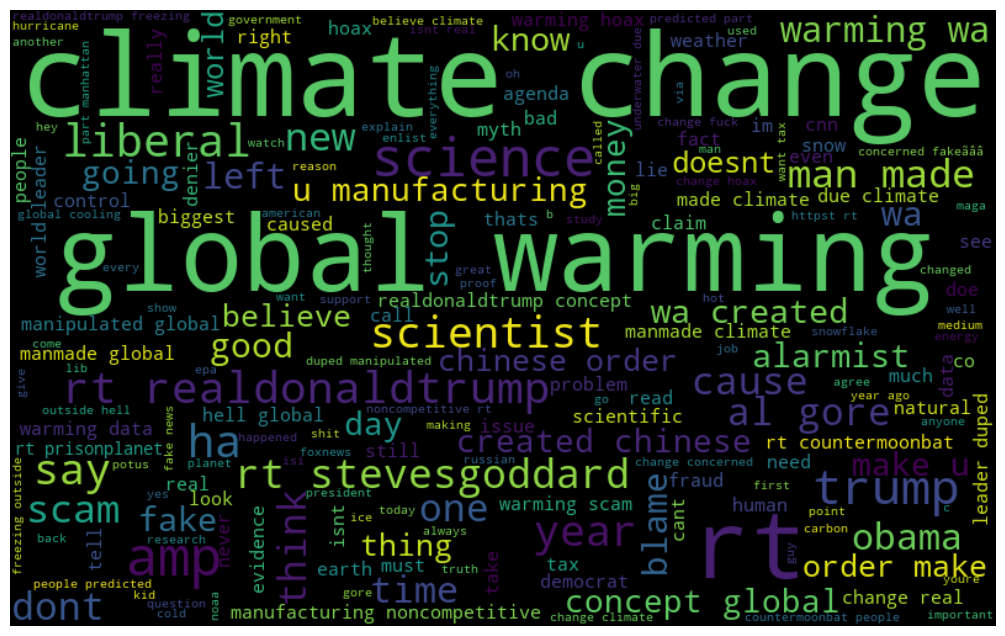

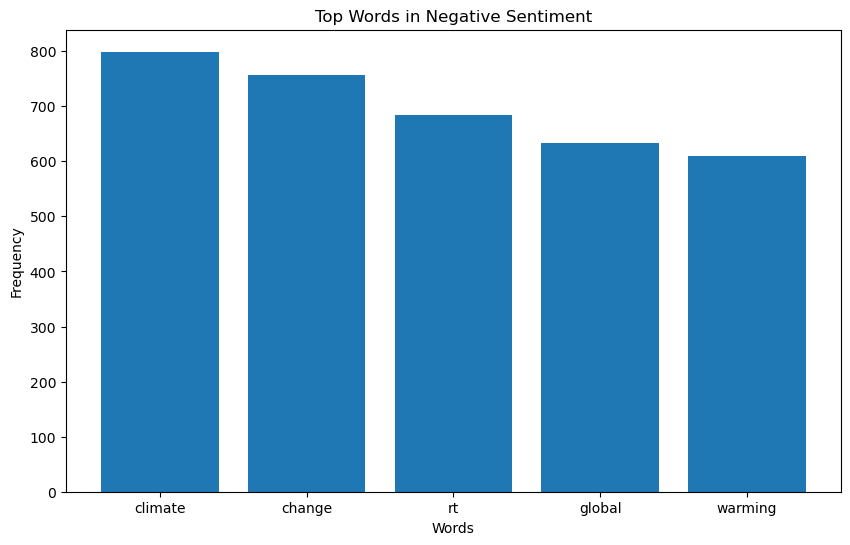

In [18]:
# showing the top words in negative setiment by combining the message and sentiment column
negative_words = " ".join([sentence for sentence in df['clean_message'][df['sentiment'] == -1]])

# Generating WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(negative_words)

# Plotting the WordCloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Converting it to a bar plot
# Tokenize the words
tokens = negative_words.split()

# Counting occurrences of each word
word_counts = Counter(tokens)

# Getting the top N words
top_words = word_counts.most_common(5) 

# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar([word[0] for word in top_words], [word[1] for word in top_words])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Words in Negative Sentiment')
plt.show()

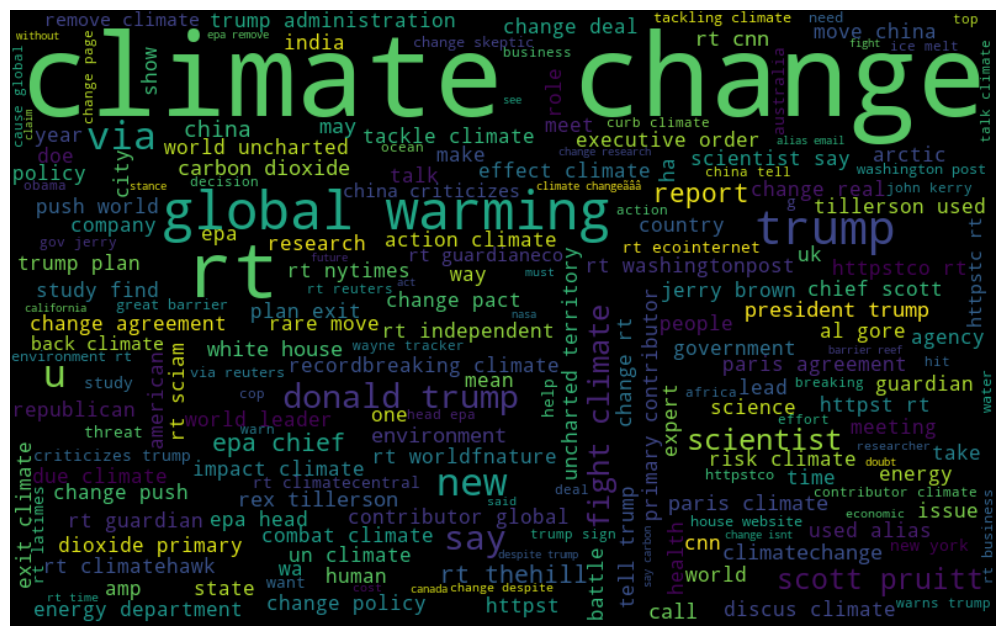

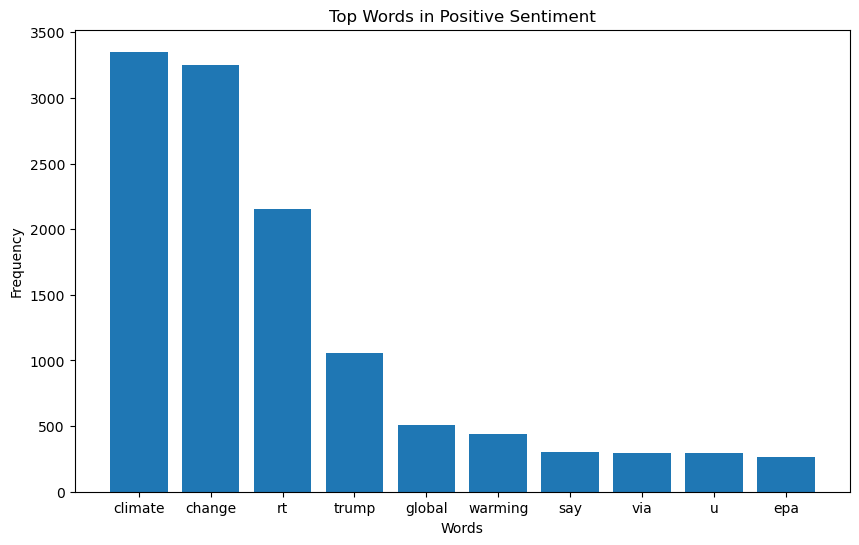

In [19]:
# showing the top words in positive setiment by combining the message and sentiment column
positive_words = " ".join([sentence for sentence in df['clean_message'][df['sentiment'] == 2]])

# Generating WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(positive_words)

# Plotting the WordCloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Converting it to a bar plot
# Tokenize the words
tokens = positive_words.split()

# Counting occurrences of each word
word_counts = Counter(tokens)

# Getting the top N words
top_words = word_counts.most_common(10) 

# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar([word[0] for word in top_words], [word[1] for word in top_words])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Words in Positive Sentiment')
plt.show()

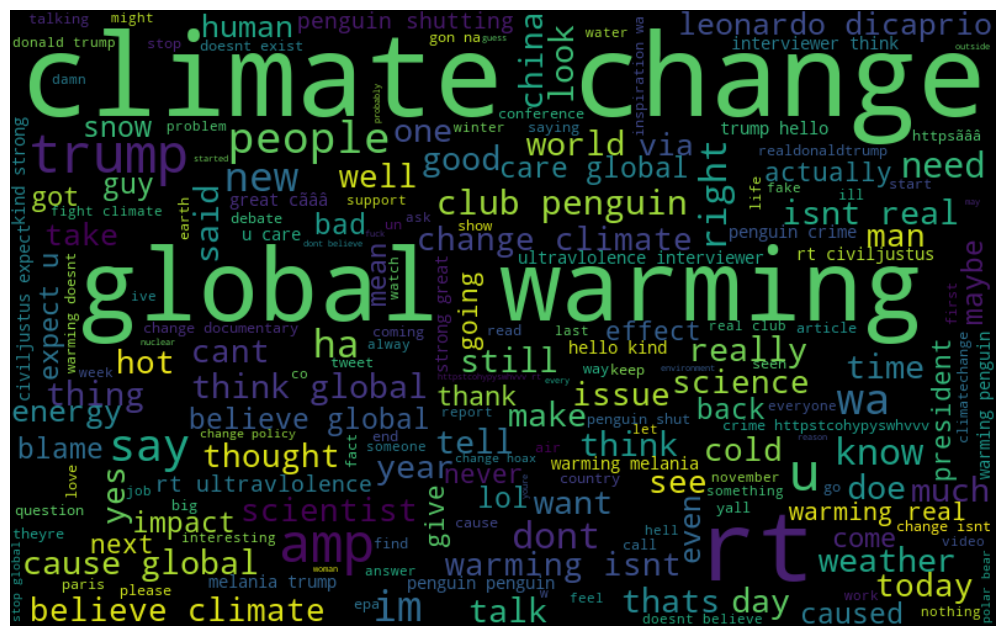

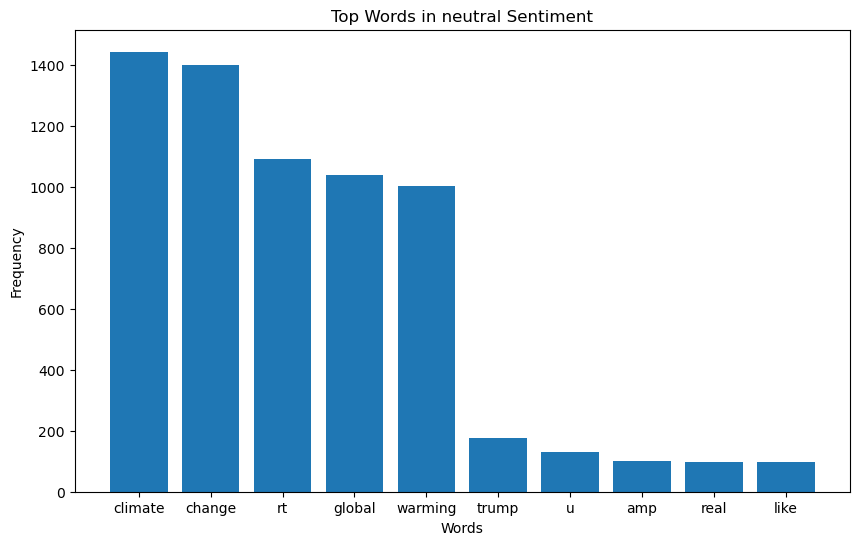

In [20]:
# showing the top words in neutral setiment by combining the message and sentiment column

neutral_words = " ".join([sentence for sentence in df['clean_message'][df['sentiment'] == 0]])

# Generating WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(neutral_words)

# Ploting the WordCloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Converting it to a bar plot
# Tokenize the words
tokens = neutral_words.split()

# Counting occurrences of each word
word_counts = Counter(tokens)

# Getting the top N words
top_words = word_counts.most_common(10) 

# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar([word[0] for word in top_words], [word[1] for word in top_words])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Words in neutral Sentiment')
plt.show()

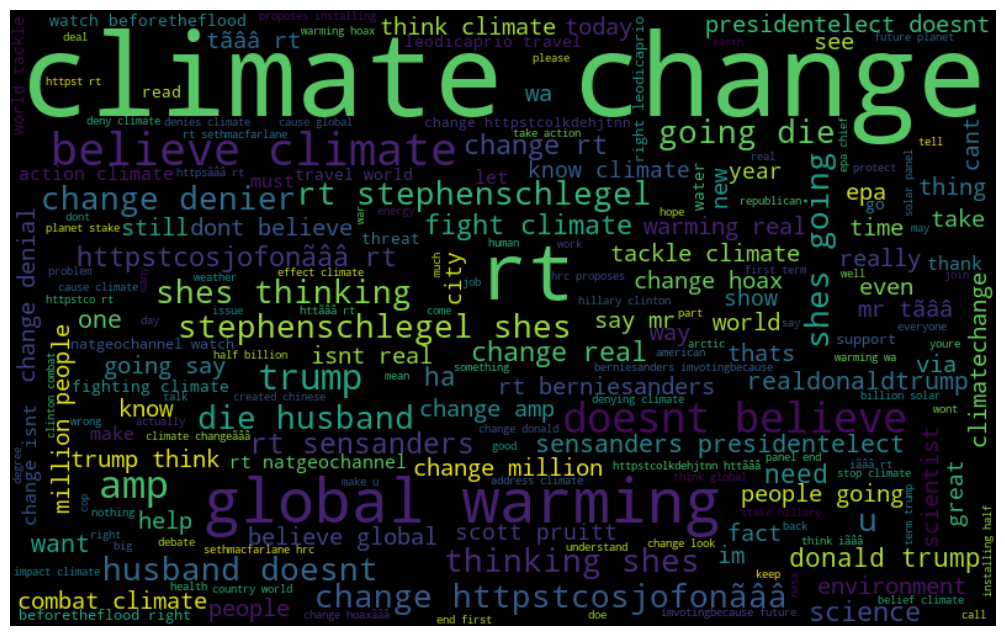

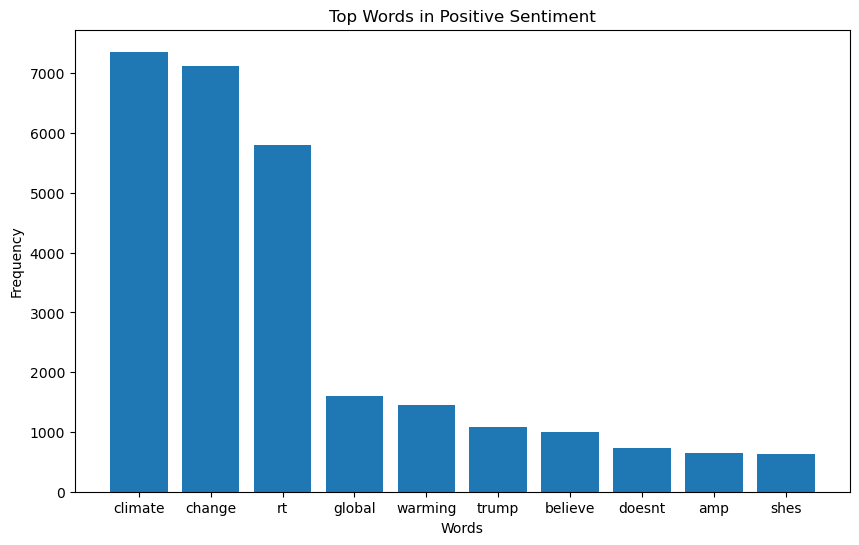

In [21]:
# showing the top words in positive setiment (1) by combining the message and sentiment column

positive_words = " ".join([sentence for sentence in df['clean_message'][df['sentiment'] == 1]])

# Generating WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(positive_words)

# Ploting the WordCloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Converting it to a bar plot
# Tokenize the words
tokens = positive_words.split()

# Counting occurrences of each word
word_counts = Counter(tokens)

# Getting the top N words
top_words = word_counts.most_common(10)

# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar([word[0] for word in top_words], [word[1] for word in top_words])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Words in Positive Sentiment')
plt.show()

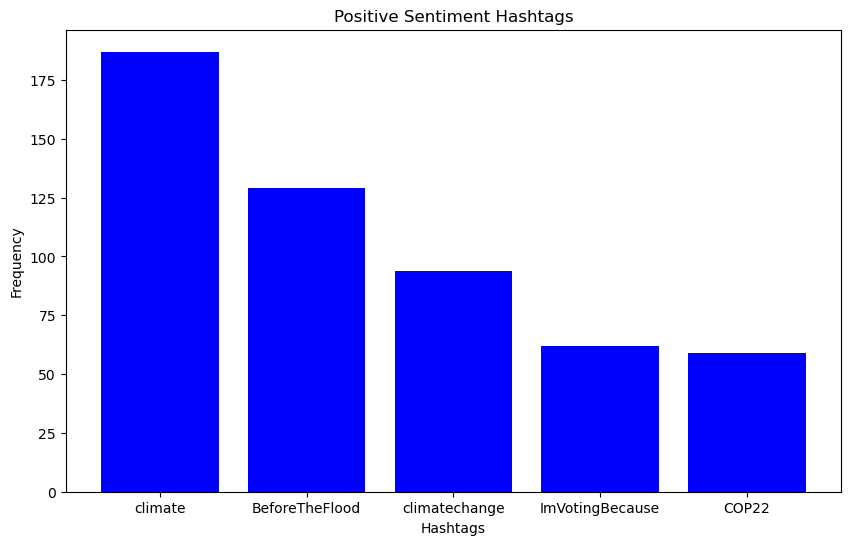

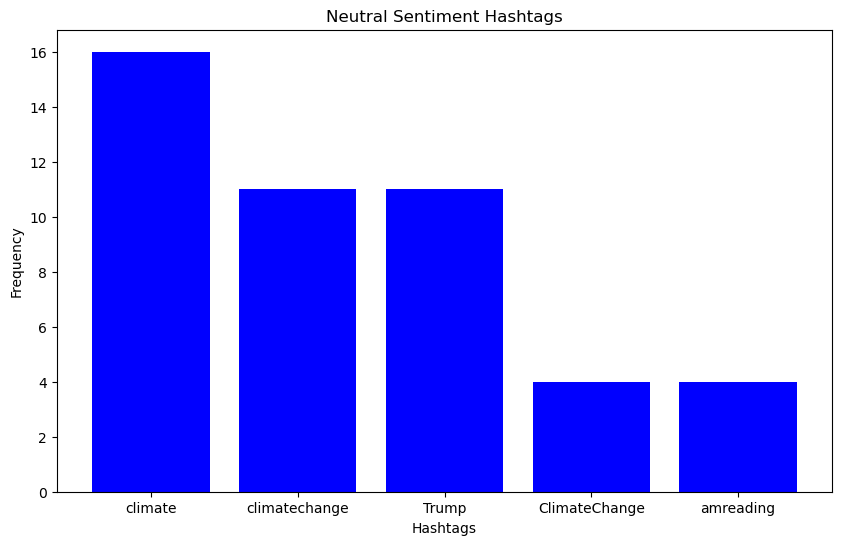

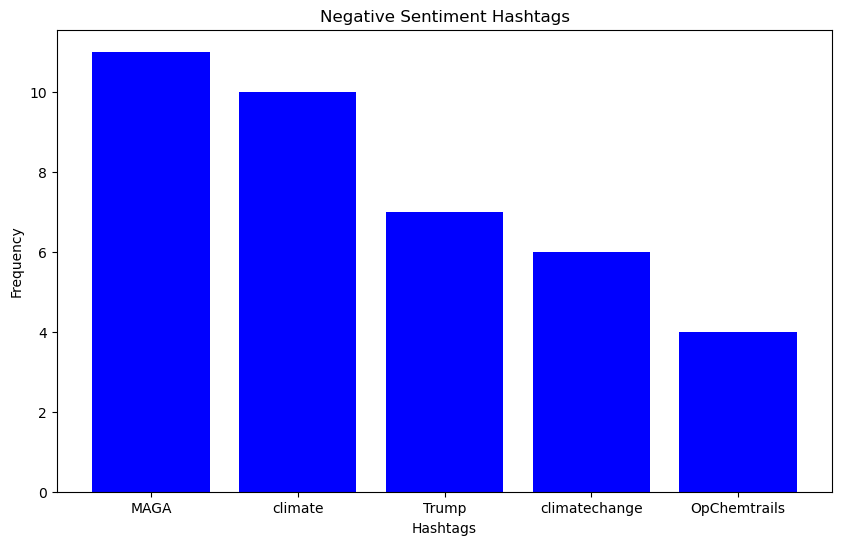

In [24]:
# Function to extract hashtags
def hashtag_extract(message):
    hashtags = []
    for tweet in message:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.extend(ht)
    return hashtags

# Extracting hashtags for each sentiment category
positive_hashtags = hashtag_extract(df['message'][df['sentiment'] == 1])
neutral_hashtags = hashtag_extract(df['message'][df['sentiment'] == 0])
negative_hashtags = hashtag_extract(df['message'][df['sentiment'] == -1])

# Function to plot bar chart of hashtag frequencies
def plot_hashtag_frequencies(hashtags, title):
    counter = Counter(hashtags)
    common_hashtags = counter.most_common(5)  # Top 5 hashtags
    labels, values = zip(*common_hashtags)
    
    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color='blue')
    plt.title(title)
    plt.xlabel('Hashtags')
    plt.ylabel('Frequency')
    plt.show()

# Ploting hashtag frequencies for each sentiment category
plot_hashtag_frequencies(positive_hashtags, 'Positive Sentiment Hashtags')
plot_hashtag_frequencies(neutral_hashtags, 'Neutral Sentiment Hashtags')
plot_hashtag_frequencies(negative_hashtags, 'Negative Sentiment Hashtags')

## Spliting dataset

In [25]:
# Feature Extraction
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['clean_message'])
y = LabelEncoder().fit_transform(df['sentiment'])


In [26]:
# Model Building and Evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model building

In [27]:
# RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Evaluation for RandomForestClassifier
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.86      0.27      0.42       278
           1       0.53      0.33      0.41       425
           2       0.71      0.89      0.79      1755
           3       0.76      0.64      0.70       706

    accuracy                           0.71      3164
   macro avg       0.72      0.53      0.58      3164
weighted avg       0.71      0.71      0.68      3164

Confusion Matrix:
[[  76   36  154   12]
 [   4  140  261   20]
 [   5   72 1568  110]
 [   3   16  233  454]]


In [28]:
# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
# Evaluation for Logistic Regression
y_pred_logreg = logreg_model.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.71      0.49      0.58       278
           1       0.52      0.45      0.48       425
           2       0.78      0.84      0.81      1755
           3       0.76      0.75      0.75       706

    accuracy                           0.74      3164
   macro avg       0.69      0.63      0.66      3164
weighted avg       0.73      0.74      0.73      3164

Confusion Matrix:
[[ 135   45   88   10]
 [  16  192  189   28]
 [  34  109 1481  131]
 [   5   26  147  528]]


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
# Support Vector Machine (SVM) Model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Evaluation for SVM
y_pred_svm = svm_model.predict(X_test)
print("Support Vector Machine:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

Support Vector Machine:
              precision    recall  f1-score   support

           0       0.90      0.23      0.36       278
           1       0.65      0.32      0.43       425
           2       0.71      0.92      0.80      1755
           3       0.80      0.69      0.74       706

    accuracy                           0.73      3164
   macro avg       0.76      0.54      0.58      3164
weighted avg       0.74      0.73      0.70      3164

Confusion Matrix:
[[  63   19  187    9]
 [   3  135  266   21]
 [   1   44 1619   91]
 [   3   10  209  484]]


In [30]:
# Dimensionality Reduction - PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())


In [31]:
# K-means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


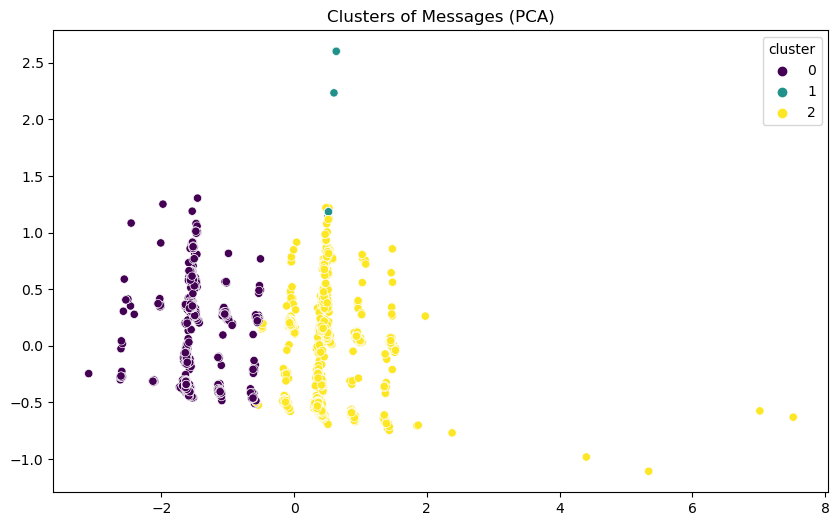

In [32]:
# Visualization of Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='viridis', legend='full')
plt.title('Clusters of Messages (PCA)')
plt.show()

In [ ]:
# Neural Network Classifier
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)

# Evaluation
y_pred_mlp = mlp_model.predict(X_test)
print("Neural Network Classifier:")
print(classification_report(y_test, y_pred_mlp))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp))